In [1]:
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
TensorFlow version :  1.14.0
Keras version :  2.3.1


Using TensorFlow backend.


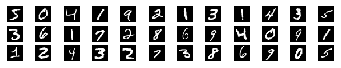

In [2]:
from keras.datasets import mnist
mnist = keras.datasets.mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

import matplotlib.pylab as plt

plt.figure(figsize = (6, 1))
for i in range(36):
    plt.subplot(3,12,i+1)
    plt.imshow(X_train0[i], cmap='gray')
    plt.axis("off")
plt.show()

In [3]:
img_rows = 28
img_cols = 28

(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:

model = Sequential()
model.add(Conv2D(23, kernel_size=(5,5), strides=(1,1), padding='same', 
                 activation = 'relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, (2,2), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 23)        598       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 23)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        5952      
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              12545000  
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)             

In [7]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, 
                verbose = 1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.1534 - accuracy: 0.9535 - val_loss: 0.0454 - val_accuracy: 0.9841
Epoch 2/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0317 - val_accuracy: 0.9894
Epoch 3/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.0277 - val_accuracy: 0.9914
Epoch 4/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.0242 - val_accuracy: 0.9916
Epoch 5/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0208 - val_accuracy: 0.9937
Epoch 6/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0263 - val_accuracy: 0.9920
Epoch 7/12
60000/60000 [==============================] - 152

Test loss:  0.03141142199306218
Test accuracy:  0.9930999875068665


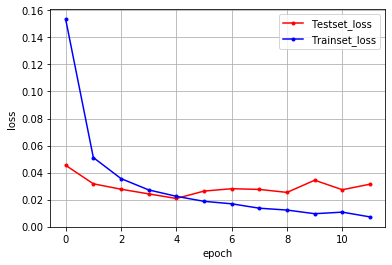

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

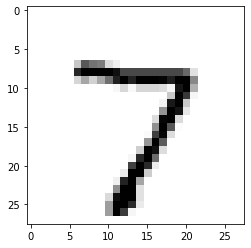

The Answer is  [7]


In [9]:
n = 0
plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()
print('The Answer is ', model.predict_classes(x_test[n].reshape((1,28,28,1))))